In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage import measure

from at_synapse_detection import dataAccess as da

In [3]:
%matplotlib notebook

In [ ]:
# Load the annotation images and convert them into a dictionary object. 
# Each key corresponds to the ID number in the annotation. 

In [ ]:
fn_base = 'labels/collman_M247514_Rorb_1_Site3Align2_EM_m247514_Site3Annotation_MN_global_x0-14020_y0-14723_z' #00.tif'
labels_dict = dict()

for z in range(0, 49):
    print("Loading: ", str(z))
    fn = fn_base + str(z).zfill(2) + '.tif'
    im = io.imread(fn)
    all_labels = measure.label(im>0)
    stats = measure.regionprops(all_labels, im)
    #print("Loaded: ", str(z))

    for stat in stats: 
        coords = stat.coords
        cordlist = [] 
        idval = stat.mean_intensity
        
        if stat.min_intensity != stat.max_intensity: 
#             print('Label: ', stat.label, ' Min Value: ', stat.min_intensity, ' Max Value: ', stat.max_intensity)
#             print(stat.bbox)
            idval = stat.min_intensity

        for pt in coords: 
            pt = np.append(pt, z)
            cordlist.append(pt)

        # test to see if key exists
        if idval in labels_dict.keys(): 
            coords = labels_dict[idval]
            foo = np.concatenate((coords, cordlist))
            labels_dict[idval] = foo
            #print('yaya')

        else: 
            labels_dict[idval] = cordlist



In [ ]:
# save dict 
np.save('labels_dict.npy', labels_dict)

In [ ]:
"""Convert labels from EM space to LM space 
Factor = 0.03125 or 3/96

For each point, multiply xy by the factor""" 
lm_labels_dict = dict() 


for key in labels_dict.keys(): 
    
    annotations = np.array(labels_dict[key])
    annotations[:, 0] = annotations[:, 0] * 0.03125
    annotations[:, 1] = annotations[:, 1] * 0.03125
    annotations = np.unique(annotations, axis=0)
    lm_labels_dict[key] = annotations
    

In [ ]:
keylist = lm_labels_dict.keys()

In [ ]:
len(keylist)

In [ ]:
min(keylist)

In [ ]:
np.save('lm_labels_dict.npy', lm_labels_dict);

In [4]:
lm_labels_dict = np.load('lm_labels_dict.npy').item()

In [5]:
# Create annovol 
labelvol = np.zeros((460, 438, 49))

In [6]:
for key in lm_labels_dict.keys(): 
    
    anno = lm_labels_dict[key]
    for n in range(0, anno.shape[0]): 
        #print(anno[n])
        labelvol[anno[n][0], anno[n][1], anno[n][2]] = 1

<IPython.core.display.Javascript object>


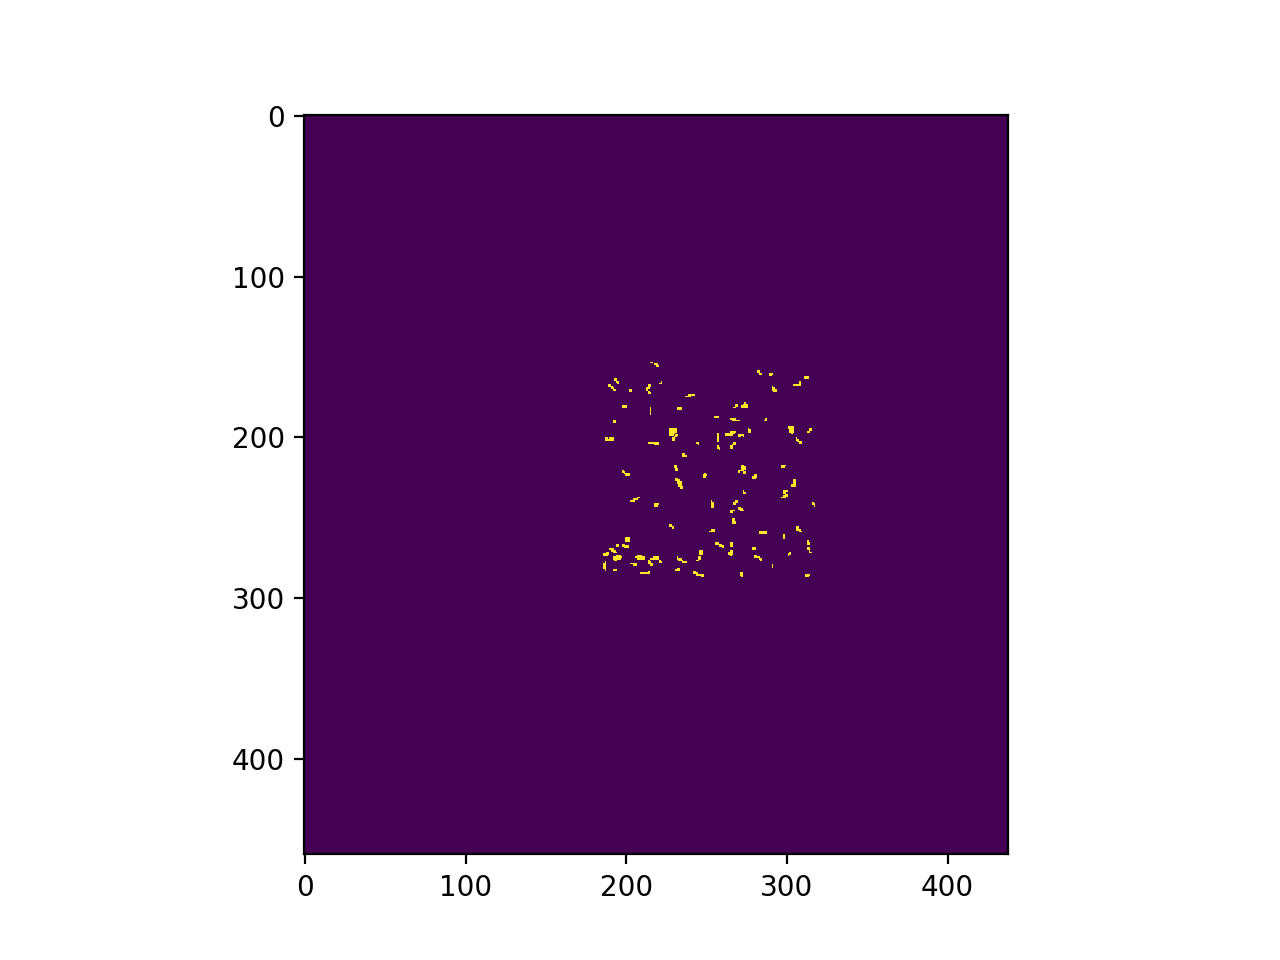

In [7]:
plt.figure()
plt.imshow(labelvol[:, :, 1])

In [9]:
import numpy as np 

In [8]:
boundranges = np.zeros((50, 4))

In [ ]:
for n in range(0, labelvol.shape[2]): 

    slicemask = labelvol[:, : n]
    
    mask_label = measure.label(slicemask)
    detections = measure.regionprops(mask_label)
    print(n)
    print(len(detections))
    
    global_minx = float('inf')
    global_miny = float('inf')

    global_maxx = 0
    global_maxy = 0 

    for detection in detections: 

        anno = detection.coords

        if np.min(anno[:, 0]) < global_minx: 
            global_minx = np.min(anno[:, 0])

        if np.min(anno[:, 1]) < global_miny: 
            global_miny = np.min(anno[:, 1])

        if np.max(anno[:, 0]) > global_maxx: 
            global_maxx = np.max(anno[:, 0])

        if np.max(anno[:, 1]) > global_maxy: 
            global_maxy = np.max(anno[:, 1])
            
    
            
    boundranges[n, 0] = global_minx
    boundranges[n, 1] = global_miny
    boundranges[n, 2] = global_maxx
    boundranges[n, 3] = global_maxy

In [ ]:
anno

In [ ]:
# Determine the mask 

# Loop over all the annotations 
global_minx = float('inf')
global_miny = float('inf')

global_maxx = 0
global_maxy = 0 

for key in lm_labels_dict.keys(): 
    
    anno = lm_labels_dict[key]
#     print(np.min(anno[:, 0]))
    if np.min(anno[:, 0]) < global_minx: 
        global_minx = np.min(anno[:, 0])

    if np.min(anno[:, 1]) < global_miny: 
        global_miny = np.min(anno[:, 1])

    if np.max(anno[:, 0]) > global_maxx: 
        global_maxx = np.max(anno[:, 0])

    if np.max(anno[:, 1]) > global_maxy: 
        global_maxy = np.max(anno[:, 1])
            
            

In [ ]:
print(global_minx, global_maxx)
print(global_miny, global_maxy)


In [ ]:
keylist = lm_labels_dict.keys()

In [ ]:
len(keylist)